# Final Project Submission
Please fill out:

-  Student name: Steven Rosa
-  Student pace: part time
-  Scheduled project review date/time: Mon 4 Feb 2019 2pm EST
-  Instructor name: Jeff Herman
-  Blog post URL:

# Northwind Data Analysis

<a id="top"></a>

# Contents
- [Import libraries](#importlibraries)
- [Write functions](#writefunctions)
- [Exploratory data analysis](#eda)
- [Hypothesis Test 1](#hypo1): Discounts and orders
- [Hypothesis Test 2](#hypo2): Sales by London office versus PNW offices
- [Hypothesis Test 3](#hypo3): Sales in 2013 v. 2014
- [Hypothesis Test 4](#hypo4): Orders and beverages

<a id="importlibraries"></a>

# Import libraries
[(Back to top)](#top)

In [1]:
#Import libraries
import sqlalchemy #ORM
from sqlalchemy import create_engine #To connect to the database
from sqlalchemy.orm import Session, sessionmaker #To interact with the database as object
from sqlalchemy import inspect #To look at tables and column names
from sqlalchemy import MetaData #To reflect the engine object 
from sqlalchemy.ext.automap import automap_base # To create mappings from the reflection
import pandas as pd #To read in parts of the database as DataFrames
import matplotlib.pyplot as plt #For creating visualizations
%matplotlib inline
from scipy import stats #For pulling t values
from scipy.stats import norm #For plotting probablity density functions
import seaborn as sns #For plotting pdfs over histograms
import numpy as np #For mathematical operations and arrays
from sklearn.utils import resample #To pull samples from a small distribution (bootstrapping)

<a id="writefunctions"></a>

# Write functions
[(Back to top)](#top)

<a id="eda"></a>

# Exploratory data analysis
[(Back to top)](#top)

In [2]:
#Instantiate a session of the ORM
#Connect to the sqlite database file
engine = create_engine('sqlite:///Northwind_small.sqlite', echo = True)
#Bind a session factory to the engine
Session = sessionmaker(bind=engine)
#Instantiate a session
session = Session()

In [3]:
#An object to get a first look at the database
inspector = inspect(engine)

2019-02-02 08:35:37,565 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-02-02 08:35:37,568 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,569 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-02-02 08:35:37,570 INFO sqlalchemy.engine.base.Engine ()


In [4]:
#Make a dict of list of names of all the columns in all the tables
#for easy reference

#Get list of all table names
table_names = inspector.get_table_names()

tables_columns = dict()
#For each table name
for table in table_names:
    column_names = []
    #for each column in the table, get just the name
    for column in inspector.get_columns(table):
        column_names.append(column['name'])
    tables_columns[table] = column_names

2019-02-02 08:35:37,605 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-02-02 08:35:37,606 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,609 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-02-02 08:35:37,609 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,612 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-02-02 08:35:37,612 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,615 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CustomerCustomerDemo")
2019-02-02 08:35:37,615 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,617 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CustomerDemographic")
2019-02-02 08:35:37,617 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,620 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Employee")
2019-02-02 08:35:37,620 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:37,622 INFO sqlalche

In [6]:
#######################################
#AUTOMAPPER BITS
#Instantiate metadata to reflect the engine
metadata = MetaData()

metadata.reflect(engine)

#Create mappings to treat the database elements as OOP objects
Base = automap_base(metadata=metadata)
Base.prepare()

2019-02-02 08:35:45,283 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-02-02 08:35:45,283 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,283 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-02-02 08:35:45,293 INFO sqlalchemy.engine.base.Engin

2019-02-02 08:35:45,361 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-02-02 08:35:45,361 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,362 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-02-02 08:35:45,363 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,364 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-02-02 08:35:45,364 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,365 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-02-02 08:35:45,366 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,367 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-02-02 08:35:45,367 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,368 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-02-02 08:35:45,426 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-02-02 08:35:45,426 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,428 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-02-02 08:35:45,429 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,430 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-02-02 08:35:45,430 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,431 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-02-02 08:35:45,431 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,432 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-02-02 08:35:45,433 INFO sqlalchemy.engine.base.Engine ()
2019-02-02 08:35:45,433 INFO 

In [7]:
#Create an object for each table
Category = Base.classes.Category
Customer = Base.classes.Customer
CustomerCustomerDemo = Base.classes.CustomerCustomerDemo
CustomerDemographic = Base.classes.CustomerDemographic
Employee = Base.classes.Employee
EmployeeTerritory = Base.classes.EmployeeTerritory
Order = Base.classes.Order
OrderDetail = Base.classes.OrderDetail
Product = Base.classes.Product
Region = Base.classes.Region
Shipper = Base.classes.Shipper
Supplier = Base.classes.Supplier
Territory = Base.classes.Territory

In [10]:
#What does the company sell?
#Look at descriptions of categories for items sold
for instance in session.query(Category):
    print(instance.CategoryName, ":", instance.Description)

2019-02-01 20:20:03,279 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-02-01 20:20:03,281 INFO sqlalchemy.engine.base.Engine SELECT "Category"."Id" AS "Category_Id", "Category"."CategoryName" AS "Category_CategoryName", "Category"."Description" AS "Category_Description" 
FROM "Category"
2019-02-01 20:20:03,281 INFO sqlalchemy.engine.base.Engine ()
Beverages : Soft drinks, coffees, teas, beers, and ales
Condiments : Sweet and savory sauces, relishes, spreads, and seasonings
Confections : Desserts, candies, and sweet breads
Dairy Products : Cheeses
Grains/Cereals : Breads, crackers, pasta, and cereal
Meat/Poultry : Prepared meats
Produce : Dried fruit and bean curd
Seafood : Seaweed and fish


In [11]:
#How many customers ae served?
names = []
for instance in session.query(Customer):
    names.append(instance.ContactName)

print('\n')
print(len(set(names)), 'customers served.')

2019-02-01 20:20:07,794 INFO sqlalchemy.engine.base.Engine SELECT "Customer"."Id" AS "Customer_Id", "Customer"."CompanyName" AS "Customer_CompanyName", "Customer"."ContactName" AS "Customer_ContactName", "Customer"."ContactTitle" AS "Customer_ContactTitle", "Customer"."Address" AS "Customer_Address", "Customer"."City" AS "Customer_City", "Customer"."Region" AS "Customer_Region", "Customer"."PostalCode" AS "Customer_PostalCode", "Customer"."Country" AS "Customer_Country", "Customer"."Phone" AS "Customer_Phone", "Customer"."Fax" AS "Customer_Fax" 
FROM "Customer"
2019-02-01 20:20:07,795 INFO sqlalchemy.engine.base.Engine ()


91 customers served.


In [12]:
#How many customers are served in each region?
regions = []
for instance in session.query(Customer):
    regions.append(instance.Region)

regions_df = pd.DataFrame(regions)
regions_df[0].value_counts()

2019-02-01 20:20:10,738 INFO sqlalchemy.engine.base.Engine SELECT "Customer"."Id" AS "Customer_Id", "Customer"."CompanyName" AS "Customer_CompanyName", "Customer"."ContactName" AS "Customer_ContactName", "Customer"."ContactTitle" AS "Customer_ContactTitle", "Customer"."Address" AS "Customer_Address", "Customer"."City" AS "Customer_City", "Customer"."Region" AS "Customer_Region", "Customer"."PostalCode" AS "Customer_PostalCode", "Customer"."Country" AS "Customer_Country", "Customer"."Phone" AS "Customer_Phone", "Customer"."Fax" AS "Customer_Fax" 
FROM "Customer"
2019-02-01 20:20:10,739 INFO sqlalchemy.engine.base.Engine ()


Western Europe     28
North America      16
South America      16
Southern Europe    10
British Isles       8
Central America     5
Northern Europe     4
Scandinavia         3
Eastern Europe      1
Name: 0, dtype: int64

In [45]:
#How many products are in each category?
#Some products have been discontinued. Must exclude these from query
prod_cats = pd.read_sql_query('''SELECT ca.Id, ca.CategoryName,
                                COUNT(p.ProductName) Products
                                FROM Product p
                                JOIN Category ca ON p.CategoryId = ca.Id
                                WHERE p.Discontinued == 0
                                GROUP BY ca.Id
                            ''', engine)
prod_cats

2019-02-02 08:57:57,169 INFO sqlalchemy.engine.base.Engine SELECT ca.Id, ca.CategoryName,
                                COUNT(p.ProductName) Products
                                FROM Product p
                                JOIN Category ca ON p.CategoryId = ca.Id
                                WHERE p.Discontinued == 0
                                GROUP BY ca.Id
                            


INFO:sqlalchemy.engine.base.Engine:SELECT ca.Id, ca.CategoryName,
                                COUNT(p.ProductName) Products
                                FROM Product p
                                JOIN Category ca ON p.CategoryId = ca.Id
                                WHERE p.Discontinued == 0
                                GROUP BY ca.Id
                            


2019-02-02 08:57:57,179 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,CategoryName,Products
0,1,Beverages,11
1,2,Condiments,11
2,3,Confections,13
3,4,Dairy Products,10
4,5,Grains/Cereals,6
5,6,Meat/Poultry,2
6,7,Produce,4
7,8,Seafood,12


In [115]:
#How much revenue is earned from each category?
cat_rev = pd.read_sql_query('''SELECT ca.CategoryName,
                                COUNT(DISTINCT p.ProductName) Products,
                                SUM((od.UnitPrice * (1 - od.Discount) * od.Quantity)) Revenue
                                FROM OrderDetail od
                                JOIN Product p ON od.ProductId = p.Id
                                JOIN Category ca ON p.CategoryId = ca.Id
                                GROUP BY ca.CategoryName
                                ORDER BY Revenue DESC
                            ''', engine)
cat_rev.head(2)

2019-02-02 10:13:28,818 INFO sqlalchemy.engine.base.Engine SELECT ca.CategoryName,
                                COUNT(DISTINCT p.ProductName) Products,
                                SUM((od.UnitPrice * (1 - od.Discount) * od.Quantity)) Revenue
                                FROM OrderDetail od
                                JOIN Product p ON od.ProductId = p.Id
                                JOIN Category ca ON p.CategoryId = ca.Id
                                GROUP BY ca.CategoryName
                                ORDER BY Revenue DESC
                            


INFO:sqlalchemy.engine.base.Engine:SELECT ca.CategoryName,
                                COUNT(DISTINCT p.ProductName) Products,
                                SUM((od.UnitPrice * (1 - od.Discount) * od.Quantity)) Revenue
                                FROM OrderDetail od
                                JOIN Product p ON od.ProductId = p.Id
                                JOIN Category ca ON p.CategoryId = ca.Id
                                GROUP BY ca.CategoryName
                                ORDER BY Revenue DESC
                            


2019-02-02 10:13:28,820 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,CategoryName,Products,Revenue
0,Beverages,12,267868.180
1,Dairy Products,10,234507.285


In [113]:
#
#
#Sanity check that revenue totals are equal in different queries
cat_rev['Revenue'].sum(), emp_rev['Revenue'].sum(), itemized['Total_price'].sum(), cat_subtotals['Invoice_total'].sum()

(1265793.0395, 1265793.0395, 1265793.0395, 1265793.0395)

In [ ]:
#Generic Query to show totals from invoices.
#Listed by the last name of the sales rep who fulfilled the order.
invoices = pd.read_sql_query('''SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    ''', engine)

In [202]:
prod_cats['Products'].sum()

69

In [199]:
#Checking out all products
products = pd.read_sql_query('''SELECT p.*
                                FROM Product p
                                WHERE p.Discontinued != 1
                            ''', engine)
#products

2019-02-01 17:46:28,554 INFO sqlalchemy.engine.base.Engine SELECT p.*
                                FROM Product p
                                WHERE p.Discontinued != 1
                            


INFO:sqlalchemy.engine.base.Engine:SELECT p.*
                                FROM Product p
                                WHERE p.Discontinued != 1
                            


2019-02-01 17:46:28,556 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [214]:
#How many products are in stock above par? 
products = pd.read_sql_query('''SELECT
                                    SUM(
                                        CASE WHEN p.UnitsInStock <= p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) below_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) all_above_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel
                                            AND p.UnitsInStock < (2 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) less_2x_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (2 * p.ReorderLevel)
                                            AND p.UnitsInStock < (3 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x2_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (3 * p.ReorderLevel)
                                            AND p.UnitsInStock < (4 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x3_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (4 * p.ReorderLevel)
                                            AND p.UnitsInStock < (5 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x4_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (5 * p.ReorderLevel)
                                            AND p.UnitsInStock < (6 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x5_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (6 * p.ReorderLevel)
                                            AND p.UnitsInStock < (7 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x6_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (7 * p.ReorderLevel)
                                            AND p.UnitsInStock < (8 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x7_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (8 * p.ReorderLevel)
                                            AND p.UnitsInStock < (9 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x8_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (9 * p.ReorderLevel)
                                            AND p.UnitsInStock < (10 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x9_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > (10 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) x10_par
                                FROM Product p
                            ''', engine)
products 

2019-02-01 18:12:56,433 INFO sqlalchemy.engine.base.Engine SELECT
                                    SUM(
                                        CASE WHEN p.UnitsInStock <= p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) below_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) all_above_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel
                                            AND p.UnitsInStock < (2 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1

INFO:sqlalchemy.engine.base.Engine:SELECT
                                    SUM(
                                        CASE WHEN p.UnitsInStock <= p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) below_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel 
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
                                        ) all_above_par,
                                    SUM(
                                        CASE WHEN p.UnitsInStock > p.ReorderLevel
                                            AND p.UnitsInStock < (2 * p.ReorderLevel)
                                            AND p.Discontinued != 1
                                        THEN 1 ELSE 0 END
            

2019-02-01 18:12:56,434 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,below_par,all_above_par,less_2x_par,x2_par,x3_par,x4_par,x5_par,x6_par,x7_par,x8_par,x9_par,x10_par
0,18,51,8,7,2,6,4,0,2,1,0,18


In [ ]:
#49 products out of 69 are above par

In [13]:
overstock = pd.read_sql_query('''SELECT p.*
                                FROM Product p
                                WHERE p.UnitsInStock > (10 * p.ReorderLevel)
                                    AND p.Discontinued != 1
                                ''', engine)
overstock.head()

2019-02-01 20:22:58,464 INFO sqlalchemy.engine.base.Engine SELECT p.*
                                FROM Product p
                                WHERE p.UnitsInStock > (10 * p.ReorderLevel)
                                    AND p.Discontinued != 1
                                
2019-02-01 20:22:58,464 INFO sqlalchemy.engine.base.Engine ()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
1,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
2,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0
3,12,Queso Manchego La Pastora,5,4,10 - 500 g pkgs.,38.00,86,0,0,0
4,14,Tofu,6,7,40 - 100 g pkgs.,23.25,35,0,0,0


In [188]:
tables_columns['Product']

['Id',
 'ProductName',
 'SupplierId',
 'CategoryId',
 'QuantityPerUnit',
 'UnitPrice',
 'UnitsInStock',
 'UnitsOnOrder',
 'ReorderLevel',
 'Discontinued']

In [33]:
#Look at how many territories are assigned to each employee
df = pd.read_sql_query('''SELECT e.Id, e.LastName, e.FirstName, e.Title, e.HireDate, e.City, 
                            count(et.TerritoryId) Territories
                            FROM Employee e
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            GROUP BY e.Id
                        ''', engine)
df

2019-02-01 08:29:40,062 INFO sqlalchemy.engine.base.Engine SELECT e.Id, e.LastName, e.FirstName, e.Title, e.HireDate, e.City, 
                            count(et.TerritoryId) Territories
                            FROM Employee e
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            GROUP BY e.Id
                        


INFO:sqlalchemy.engine.base.Engine:SELECT e.Id, e.LastName, e.FirstName, e.Title, e.HireDate, e.City, 
                            count(et.TerritoryId) Territories
                            FROM Employee e
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            GROUP BY e.Id
                        


2019-02-01 08:29:40,063 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,LastName,FirstName,Title,HireDate,City,Territories
0,1,Davolio,Nancy,Sales Representative,2024-05-01,Seattle,2
1,2,Fuller,Andrew,"Vice President, Sales",2024-08-14,Tacoma,7
2,3,Leverling,Janet,Sales Representative,2024-04-01,Kirkland,4
3,4,Peacock,Margaret,Sales Representative,2025-05-03,Redmond,3
4,5,Buchanan,Steven,Sales Manager,2025-10-17,London,7
5,6,Suyama,Michael,Sales Representative,2025-10-17,London,5
6,7,King,Robert,Sales Representative,2026-01-02,London,10
7,8,Callahan,Laura,Inside Sales Coordinator,2026-03-05,Seattle,4
8,9,Dodsworth,Anne,Sales Representative,2026-11-15,London,7


In [ ]:
#5 employees in the PNW USA and 4 in London. Each employee has several territories assigned

In [142]:
df = pd.read_sql_query('''SELECT e.Id, e.LastName, e.FirstName, e.City, e.HireDate,
                            r.RegionDescription,
                            COUNT(DISTINCT od.OrderId) Orders,
                            SUM(od.Quantity) Quantities
                            FROM Employee e
                            JOIN [Order] o ON e.Id = o.EmployeeId
                            JOIN OrderDetail od ON o.Id = od.OrderId
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            JOIN Territory t on et.Territoryid = t.Id
                            JOIN Region r on t.RegionId = r.Id
                            GROUP BY e.Id
                            ORDER BY e.HireDate
                        ''', engine)
df

2019-02-01 16:29:29,209 INFO sqlalchemy.engine.base.Engine SELECT e.Id, e.LastName, e.FirstName, e.City, e.HireDate,
                            r.RegionDescription,
                            COUNT(DISTINCT od.OrderId) Orders,
                            SUM(od.Quantity) Quantities
                            FROM Employee e
                            JOIN [Order] o ON e.Id = o.EmployeeId
                            JOIN OrderDetail od ON o.Id = od.OrderId
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            JOIN Territory t on et.Territoryid = t.Id
                            JOIN Region r on t.RegionId = r.Id
                            GROUP BY e.Id
                            ORDER BY e.HireDate
                        


INFO:sqlalchemy.engine.base.Engine:SELECT e.Id, e.LastName, e.FirstName, e.City, e.HireDate,
                            r.RegionDescription,
                            COUNT(DISTINCT od.OrderId) Orders,
                            SUM(od.Quantity) Quantities
                            FROM Employee e
                            JOIN [Order] o ON e.Id = o.EmployeeId
                            JOIN OrderDetail od ON o.Id = od.OrderId
                            JOIN EmployeeTerritory et ON et.EmployeeId = e.Id
                            JOIN Territory t on et.Territoryid = t.Id
                            JOIN Region r on t.RegionId = r.Id
                            GROUP BY e.Id
                            ORDER BY e.HireDate
                        


2019-02-01 16:29:29,211 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,LastName,FirstName,City,HireDate,RegionDescription,Orders,Quantities
0,3,Leverling,Janet,Kirkland,2024-04-01,Southern,127,31408
1,1,Davolio,Nancy,Seattle,2024-05-01,Eastern,123,15624
2,2,Fuller,Andrew,Tacoma,2024-08-14,Eastern,96,42385
3,4,Peacock,Margaret,Redmond,2025-05-03,Eastern,156,29394
4,5,Buchanan,Steven,London,2025-10-17,Eastern,42,21252
5,6,Suyama,Michael,London,2025-10-17,Western,67,17635
6,7,King,Robert,London,2026-01-02,Western,72,46540
7,8,Callahan,Laura,Seattle,2026-03-05,Northern,104,23652
8,9,Dodsworth,Anne,London,2026-11-15,Northern,43,18690


In [ ]:
#Earlier hire date doesn't indicate higher sales per employee

In [43]:
#Examine how often each product is sold with/without discount

product_discs = pd.read_sql_query('''SELECT p.ProductName, od.UnitPrice,
                            COUNT(od.Id) Times_ordered,
                            SUM(
                                CASE WHEN od.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) not_discounted,
                            SUM(
                                CASE WHEN od.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) discounted
                            FROM Product p
                            JOIN OrderDetail od on p.Id = od.ProductId
                            GROUP BY p.ProductName
                        ''', engine)

product_discs.head(10)

2019-02-01 21:35:14,245 INFO sqlalchemy.engine.base.Engine SELECT p.ProductName, od.UnitPrice,
                            COUNT(od.Id) Times_ordered,
                            SUM(
                                CASE WHEN od.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) not_discounted,
                            SUM(
                                CASE WHEN od.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) discounted
                            FROM Product p
                            JOIN OrderDetail od on p.Id = od.ProductId
                            GROUP BY p.ProductName
                        


INFO:sqlalchemy.engine.base.Engine:SELECT p.ProductName, od.UnitPrice,
                            COUNT(od.Id) Times_ordered,
                            SUM(
                                CASE WHEN od.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) not_discounted,
                            SUM(
                                CASE WHEN od.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) discounted
                            FROM Product p
                            JOIN OrderDetail od on p.Id = od.ProductId
                            GROUP BY p.ProductName
                        


2019-02-01 21:35:14,261 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,ProductName,UnitPrice,Times_ordered,not_discounted,discounted
0,Alice Mutton,39.00,37,21,16
1,Aniseed Syrup,10.00,12,10,2
2,Boston Crab Meat,18.40,41,25,16
3,Camembert Pierrot,34.00,51,28,23
4,Carnarvon Tigers,62.50,27,14,13
5,Chai,18.00,38,22,16
6,Chang,19.00,44,19,25
7,Chartreuse verte,18.00,30,16,14
8,Chef Anton's Cajun Seasoning,22.00,20,10,10
9,Chef Anton's Gumbo Mix,21.35,10,6,4


In [83]:
#
#
#Did more products have higher sales with or without discounts?
total_products = products_discs.shape[0]
more_without_discs = products_discs[products_discs['not_discounted'] > products_discs['discounted']]
more_with_discs = products_discs[products_discs['not_discounted'] < products_discs['discounted']]

print('Products with higher sales when not discounted:', more_without_discs.shape[0])
print('Products with higher sales when discounted:', more_with_discs.shape[0])
if more_without_discs.shape[0] > more_with_discs.shape[0]:
    print("More products had higher sales without discounts than with discounts.")

Products with higher sales when not discounted: 64
Products with higher sales when discounted: 9
More products had higher sales without discounts than with discounts.


In [47]:
#
#
#Did the products which had higher sales when discounted have a higher unit price on average?
mean_without = more_without_discs['UnitPrice'].mean()
mean_with = more_with_discs['UnitPrice'].mean()

print('Mean unit price for products which had higher sales when not discounted:',
      mean_without)
print('Mean unit price for products which had higher sales when discounted:',
     mean_with)
if mean_without > mean_with:
    print('Products with sales when discounted did not have a higher unit price on average.')

Mean unit price for products which had higher sales when not discounted: 29.53453125
Mean unit price for products which had higher sales when discounted: 26.883333333333333
Products with sales when discounted did not have a higher unit price on average.


In [80]:
#
#Itemized Revenue by OrderDetail

itemized = pd.read_sql_query('''SELECT od.Id, od.OrderId, p.ProductName, od.UnitPrice, 
                            od.Quantity, od.Discount,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        ''', engine)
itemized.head()


2019-02-02 09:30:21,068 INFO sqlalchemy.engine.base.Engine SELECT od.Id, od.OrderId, p.ProductName, od.UnitPrice, 
                            od.Quantity, od.Discount,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        


INFO:sqlalchemy.engine.base.Engine:SELECT od.Id, od.OrderId, p.ProductName, od.UnitPrice, 
                            od.Quantity, od.Discount,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        


2019-02-02 09:30:21,070 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductName,UnitPrice,Quantity,Discount,Total_price
0,10248/11,10248,Queso Cabrales,14.0,12,0.0,168.0
1,10248/42,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0,98.0
2,10248/72,10248,Mozzarella di Giovanni,34.8,5,0.0,174.0
3,10249/14,10249,Tofu,18.6,9,0.0,167.4
4,10249/51,10249,Manjimup Dried Apples,42.4,40,0.0,1696.0


In [92]:
#Has higher revenue been taken in on products with or without discounts?

#Get invoice subtotals from only items that weren't discounted
subtotals_without_disc = itemized['Total_price'][itemized['Discount'] == 0.0]
#Get invoice subttoals from only items that were discounted
subtotals_with_disc = itemized['Total_price'][itemized['Discount'] != 0.0]

#Add up subtotals for all undiscounted items
revenue_without_disc = subtotals_without_disc.sum()
#Add up subtotals for all discounted items
revenue_with_disc = subtotals_with_disc.sum()

print('Revenue from undiscounted items:', revenue_without_disc)
print('Revenue from discounted items:', revenue_with_disc)
if revenue_without_disc > revenue_with_disc:
    print('Revenue was higher from undiscounted items.')

Revenue from undiscounted items: 750698.61
Revenue from discounted items: 515094.42949999997
Revenue was higher from undiscounted items.


In [77]:
#Discrepancies in unit prices between Product table and OrderDetail table

invoices_testing = pd.read_sql_query('''SELECT od.Id, od.OrderId, p.ProductName, p.UnitPrice UnitPriceP, 
                            od.UnitPrice UnitPriceOd, od.Quantity, od.Discount,
                            ((p.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_with_P,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_withOd
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        ''', engine)
invoices_testing.head(10)

2019-02-01 12:51:13,076 INFO sqlalchemy.engine.base.Engine SELECT od.Id, od.OrderId, p.ProductName, p.UnitPrice UnitPriceP, 
                            od.UnitPrice UnitPriceOd, od.Quantity, od.Discount,
                            ((p.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_with_P,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_withOd
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        


INFO:sqlalchemy.engine.base.Engine:SELECT od.Id, od.OrderId, p.ProductName, p.UnitPrice UnitPriceP, 
                            od.UnitPrice UnitPriceOd, od.Quantity, od.Discount,
                            ((p.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_with_P,
                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Total_price_withOd
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductId = p.Id
                        


2019-02-01 12:51:13,077 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductName,UnitPriceP,UnitPriceOd,Quantity,Discount,Total_price_with_P,Total_price_withOd
0,10248/11,10248,Queso Cabrales,21.00,14.0,12,0.00,252.0000,168.00
1,10248/42,10248,Singaporean Hokkien Fried Mee,14.00,9.8,10,0.00,140.0000,98.00
2,10248/72,10248,Mozzarella di Giovanni,34.80,34.8,5,0.00,174.0000,174.00
3,10249/14,10249,Tofu,23.25,18.6,9,0.00,209.2500,167.40
4,10249/51,10249,Manjimup Dried Apples,53.00,42.4,40,0.00,2120.0000,1696.00
5,10250/41,10250,Jack's New England Clam Chowder,9.65,7.7,10,0.00,96.5000,77.00
6,10250/51,10250,Manjimup Dried Apples,53.00,42.4,35,0.15,1576.7500,1261.40
7,10250/65,10250,Louisiana Fiery Hot Pepper Sauce,21.05,16.8,15,0.15,268.3875,214.20
8,10251/22,10251,Gustaf's Knäckebröd,21.00,16.8,6,0.05,119.7000,95.76
9,10251/57,10251,Ravioli Angelo,19.50,15.6,15,0.05,277.8750,222.30


In [79]:
#How often is the Product unit price different from the OrderDetail unit price?
different_unit_prices = invoices_testing[invoices_testing['UnitPriceP'] != invoices_testing['UnitPriceOd']]
invoices_testing.shape[0], different_unit_prices.shape[0]

(2155, 658)

In [45]:
#
#
#How many products per supplier?
prod_supp = pd.read_sql_query('''SELECT s.CompanyName, s.Region, COUNT(p.ProductName) Products
                                    FROM Product p
                                    JOIN Supplier s ON p.SupplierId = s.Id
                                    GROUP BY s.CompanyName
                                ''', engine)
prod_supp.head()

2019-02-01 21:35:33,709 INFO sqlalchemy.engine.base.Engine SELECT s.CompanyName, s.Region, COUNT(p.ProductName) Products
                                    FROM Product p
                                    JOIN Supplier s ON p.SupplierId = s.Id
                                    GROUP BY s.CompanyName
                                


INFO:sqlalchemy.engine.base.Engine:SELECT s.CompanyName, s.Region, COUNT(p.ProductName) Products
                                    FROM Product p
                                    JOIN Supplier s ON p.SupplierId = s.Id
                                    GROUP BY s.CompanyName
                                


2019-02-01 21:35:33,709 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,CompanyName,Region,Products
0,Aux joyeux ecclésiastiques,Western Europe,2
1,Bigfoot Breweries,North America,3
2,Cooperativa de Quesos 'Las Cabras',Southern Europe,2
3,Escargots Nouveaux,Western Europe,1
4,Exotic Liquids,British Isles,3


In [ ]:

#####FOR EDA
#Pull raw results from the database
#conn = engine.connect()
#results = conn.execute('''SELECT *
#                            FROM Category
#                        ;''')
#print(results.fetchall())

###conn = engine.connect()
#results = conn.execute("SELECT * FROM [Order];")
#df = pd.DataFrame(results.fetchall())
#df.head()

#results = conn.execute('''SELECT *
#                            FROM OrderDetail
#                        ;''')
#df = pd.DataFrame(results.fetchall())
#df.head()

#df = pd.read_sql_query('''SELECT * 
#                           FROM [Order]
#                       ;''', engine)
#df.head()

<a id="hypo1"></a>

[(Back to top)](#top)

# Hypothesis Test 1: Discounts and orders

## Part 1

>**Do discounts have a statistically significant effect on the number of products customers order?** If so, at what level(s) of discount?

### What are we measuring?

This is a question about customer choice. In order to determine whether discounts affect how many products a customer buys, we must compare the quantities of products bought by the customer, with and without discounts.

### The hypotheses

>**Null hypothesis**: Discount does not have an effect on the number of products ordered by a customer. 

>>Control (orders without discount) = Treatment (orders with discount)

>**Alternative hypothesis**: Discount has an effect on the number of products ordered by a customer.

>>Control (orders without discount) != Treatment (orders with discount)

### The data

We'll write a query to pull from the database to compare the quantities of products ordered by each customer at each of the various discount levels. (The query will work for Part 1 and Part 2 of the question.)

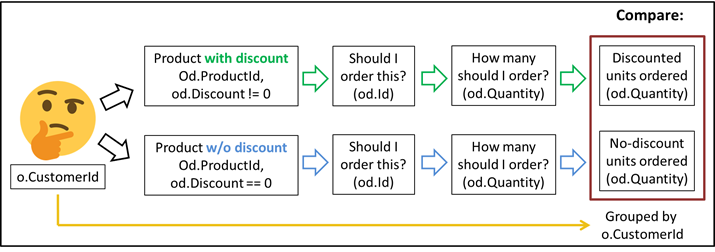

In [186]:
#Compare quantities ordered with and without discounts.
#Note that discounts of 06 and under are grouped together.
orders_discounts = pd.read_sql_query('''SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06 
                                AND OrderDetail.Discount > 0.0
                                THEN 1 ELSE 0 END
                                ) disc06,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount < 0.06
                                AND OrderDetail.Discount > 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc06,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1 
                                THEN 1 ELSE 0 END
                                ) disc10,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.1
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc10,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15 
                                THEN 1 ELSE 0 END
                                ) disc15,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.15
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc15,                            
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2 
                                THEN 1 ELSE 0 END
                                ) disc20,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.2
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc20,                                
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25 
                                THEN 1 ELSE 0 END
                                ) disc25,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.25
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_disc25,
                            Count(*) total_orders,
                            SUM(OrderDetail.Quantity) total_quantities
                            FROM OrderDetail 
                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
                            GROUP BY [Order].CustomerId
                            ORDER BY [Order].CustomerId ASC
                        ''', engine)


2019-02-02 17:09:57,328 INFO sqlalchemy.engine.base.Engine SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_all_discs,
                            SUM(
                                CASE WHEN

INFO:sqlalchemy.engine.base.Engine:SELECT [Order].CustomerId,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0 
                                THEN 1 ELSE 0 END
                                ) no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount == 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_no_disc,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0 
                                THEN 1 ELSE 0 END
                                ) all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount != 0.0
                                THEN OrderDetail.Quantity ELSE 0 END
                                ) quant_all_discs,
                            SUM(
                                CASE WHEN OrderDetail.Discount < 

2019-02-02 17:09:57,330 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [187]:
#Take a look at the table resulting from above query
#It includes data for Hypothesis Test Part 1 and Part 2
orders_discounts.head()

,CustomerId,no_disc,quant_no_disc,all_discs,quant_all_discs,disc06,quant_disc06,disc10,quant_disc10,disc15,quant_disc15,disc20,quant_disc20,disc25,quant_disc25,total_orders,total_quantities
0,ALFKI,6,78,6,96,2,56,0,0,0,0,1,2,3,38,12,174
1,ANATR,10,63,0,0,0,0,0,0,0,0,0,0,0,0,10,63
2,ANTO,9,211,8,148,0,0,4,80,4,68,0,0,0,0,17,359
3,AROUT,23,439,7,211,3,128,2,40,1,28,1,15,0,0,30,650
4,BERGS,34,632,18,369,0,0,10,161,0,0,0,0,8,208,52,1001


### Visualizing the data

Let's take a look at how our data for the treatment and control groups are distributed.

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


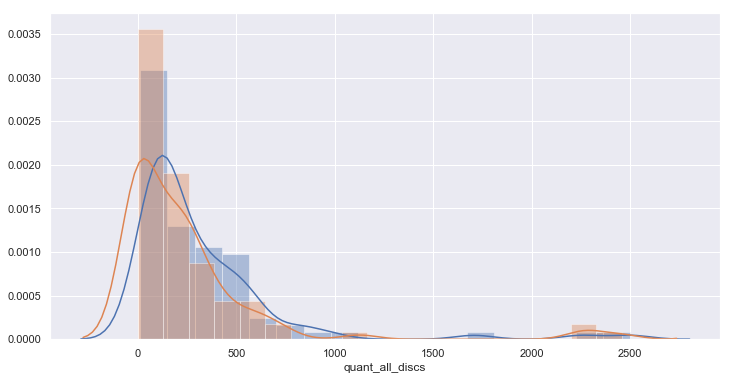

In [240]:
#Show the distribution with a kde to check for normality
sns.distplot(orders_discounts['quant_no_disc'], label = 'Quantities ordered without discount')
sns.distplot(orders_discounts['quant_all_discs'], label = 'Quantities ordered with discount (at all levels)')

In [190]:
print('Control group mean:', orders_discounts['quant_no_disc'].mean())
print('Treatment group mean:', orders_discounts['quant_all_discs'].mean())
print("The population distribution has only", orders_discounts.shape[0], "values.")

Control group mean: 321.3370786516854
Treatment group mean: 255.25842696629215
The population distribution has only 89 values.


The means are different, but we don't know if they are different *enough* to be statistically significant. Both groups have a small sample size (89), so we can simulate larger sizes for both by resampling. Then we can plot the resampled distributions and find the p value.

### The experiment: resampling by bootstrapping

In [167]:
alpha = 0.05 # The value chosen for comparison with the test statistic.
#Test statistic will need to be lower than this in order to reject the null hypothesis.

In [49]:
p = None #The value chosen for the test statistic. 
#In this case, it will be the number of differences in mean greater than
#or equal to the observed difference in mean between the no-discount dist
# (control group) and the with-discount dist (treatment group.)

In [241]:
#Put the two groups of data into arrays to be resampled &c
control1 = orders_discounts['quant_no_disc'] #The quantities of items ordered without discount
treatment1 = orders_discounts['quant_all_discs'] #The quantitites of items ordered with a discount

permus = 10000 #number of samples to take

combo = np.concatenate((control1, treatment1), axis = 0) #both dists combined for taking samples

permus_control1 = []
permus_treatment1 = []

for i in range(permus): #Generate this many permutations
    np.random.seed(i) #seed for consistency
    permus_control1.append(resample(combo, n_samples = len(control1)))
    permus_treatment1.append(resample(combo, n_samples = len(treatment1)))
    
#Take the difference in means between the two sets of permutations
diff_boot_means = (np.mean(permus_control1, axis = 1) - np.mean(permus_treatment1, axis = 1))

#Calculate the observed difference in mean, meaning the difference
#between the two actual means of the distributions
observed_diff = (np.mean(control1) - np.mean(treatment1))

#Find the p value by counting how many differences in mean were greater than 
#or equal to the observed difference in means.
means_below_observed = diff_boot_means[diff_boot_means >= observed_diff].shape[0]
p = means_below_observed / permus
#Print a summary
print('Observed difference between the means:', observed_diff)
print('The p value is', p, '.')
print('Alpha was', alpha, '.')

Observed difference between the means: 66.07865168539323
The p value is 0.1467 .
Alpha was 0.05 .


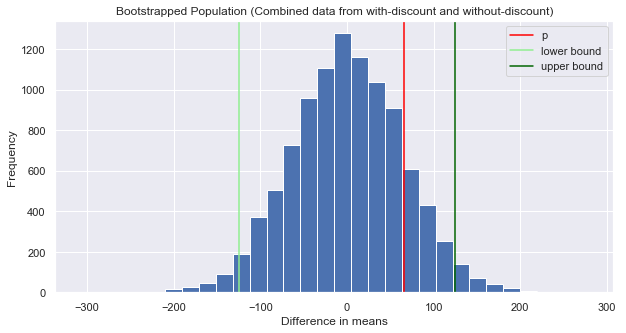

In [194]:
#Visualize the distribution

#Get the difference between control and treatment to 
#find the confidence interval
lower_bound = np.percentile(diff_boot_means, 2.5)
upper_bound = np.percentile(diff_boot_means, 97.5)

#Plot the differences in means between the 2 bootstrapped groups with the p value
fig = plt.figure(figsize = (10,5))
ax = plt.hist(diff_boot_means, bins = 30)
plt.axvline(observed_diff, color = 'red', label = 'p')
plt.axvline(lower_bound, color = 'lightgreen', label = 'lower bound')
plt.axvline(upper_bound, color = 'darkgreen', label = 'upper bound')
plt.xlabel('Difference in means')
plt.ylabel('Frequency')
plt.legend()
plt.title('Bootstrapped Population (Combined data from with-discount and without-discount)')
plt.show()

### Part 1 Conclusion:

Failure to reject null hypothesis. Discount does not have an effect on the number of products ordered by a customer.

*However . . .*

This experiment only tested for the presence or absence of a discount. 

## Part 2: 

>Do discounts have a statistically significant effect on the number of products customers order? **If so, at what level(s) of discount?**

We can run the same experiment again to compare no-discount order quantites to order quantities at each level of discount.

### What are we measuring?

This time we measure quantities at each level of discount one at a time against quantities ordered without discount. They're still grouped by customer. We'll run the experiment five times, once per discount level.

### The hypotheses

>**Null hypothesis**: Discount at 06%/10%/15%/20%/25% does not have an effect on the number of products ordered by a customer. 

>>Control (orders without discount) = Treatment (orders with discount)

>**Alternative hypothesis**: Discount at 06%/10%/15%/20%/25% has an effect on the number of products ordered by a customer.

>>Control (orders without discount) != Treatment (orders with discount)

### The data

We can use the data from Part 1 because it includes columns for quantities ordered at each discount level. We'll draw out the relevant columns from the table created above.

In [246]:
#Treatment groups with only the values associated with each level of discount
#Note that .06 discount means all discount levels up to .06
disc06 = orders_discounts['quant_disc06'] #quantities of items ordered with 06% discount
disc10 = orders_discounts['quant_disc10'] #quantities of items ordered with 10% discount
disc15 = orders_discounts['quant_disc15'] #quantities of items ordered with 15% discount
disc20 = orders_discounts['quant_disc20'] #quantities of items ordered with 20% discount
disc25 = orders_discounts['quant_disc25'] #quantities of items ordered with 25% discount

#Drop the zero values from these groups
disc06 = disc06[disc06 != 0]
disc10 = disc10[disc10 != 0]
disc15 = disc15[disc15 != 0]
disc20 = disc20[disc20 != 0]
disc25 = disc25[disc25 != 0]

#list of treatment groups
treatments = [disc06, disc10, disc15, disc20, disc25]

#List of string values of discounts, for labelling
discounts = ['.06', '.10', '.15', '.20', '.25']

#Zip together the above three lists to iterate over them all at once
treatments_discounts = list(zip(treatments, discounts))

We've clustered the data so that we can iterate over it, running the same experiment on the control group with a different treatment group each time.

### The experiment: resampling by bootstrapping (5 iterations)

At .06 discount:
Control mean 321.3370786516854
Treatment mean 126.6829268292683
Observed diff btwn means: 194.65415182241708
P-value: 0.001




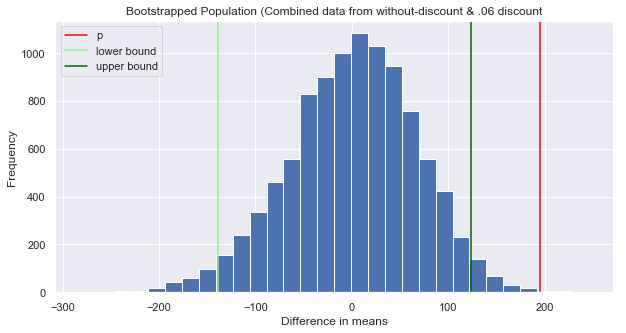

At .10 discount:
Control mean 321.3370786516854
Treatment mean 114.89473684210526
Observed diff btwn means: 206.4423418095801
P-value: 0.0005




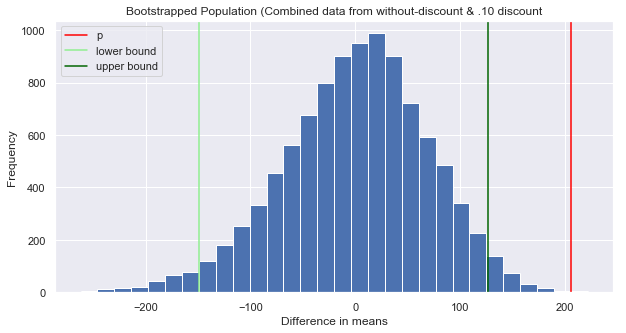

At .15 discount:
Control mean 321.3370786516854
Treatment mean 117.26315789473684
Observed diff btwn means: 204.07392075694855
P-value: 0.0008




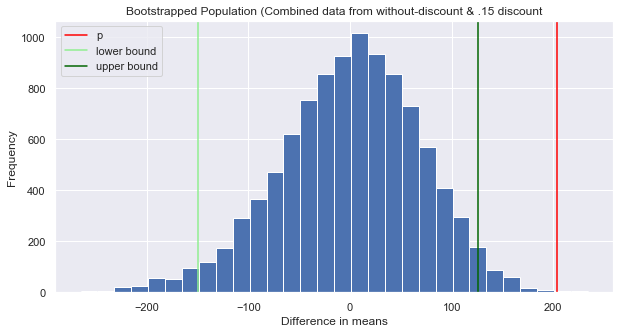

At .20 discount:
Control mean 321.3370786516854
Treatment mean 111.56410256410257
Observed diff btwn means: 209.7729760875828
P-value: 0.0006




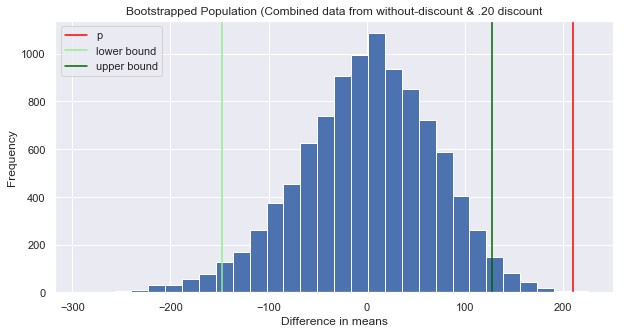

At .25 discount:
Control mean 321.3370786516854
Treatment mean 114.44736842105263
Observed diff btwn means: 206.88971023063274
P-value: 0.0004




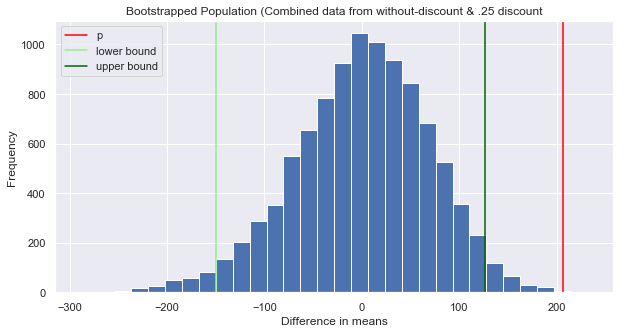

In [247]:
#Resampling by bootstrapping
permus = 10000 #number of samples to take
control = control1

#Iterate over the three lists:
#Build permutations of sample distributions,
#Find and print p values,
#Plot each distribution
for treatment, discount in treatments_discounts:
    #Combine both groups to take samples from
    combo = np.concatenate((control, treatment), axis = 0)
    
    #To be populated with permutations of samples
    permus_control = []
    #To be populated with permutations of samples
    permus_treatment = []

    for i in range(permus): #Generate this many permutations
        np.random.seed(i) #seed for consistency
        #Add a combo with the length of the control group to the permutations list
        permus_control.append(resample(combo, n_samples = len(control)))
        #Add a comobo with the length of the treatment group to the perm list
        permus_treatment.append(resample(combo, n_samples = len(treatment)))
    
    #Having filled the two permu lists with permutations of samples,
    #now take the difference in means between the two sets of permutations
    diff_boot_means = (np.mean(permus_control, axis = 1) - np.mean(permus_treatment, axis = 1))
    observed_diff = (np.mean(control) - np.mean(treatment)) 

    #Find the p value by counting how many differences in mean were greater than 
    #or equal to the observed difference in means.
    means_below_observed = diff_boot_means[diff_boot_means >= observed_diff].shape[0]
    p = means_below_observed / permus
    
    #Print summary
    print('At', discount, 'discount:')
    print('Control mean', np.mean(control))
    print('Treatment mean', np.mean(treatment))
    print('Observed diff btwn means:', observed_diff)
    print('P-value:', p)
    print('\n')
    
    #Visualize the distribution

    #Get the difference between control and treatment to 
    #find the confidence interval
    lower_bound = np.percentile(diff_boot_means, 2.5)
    upper_bound = np.percentile(diff_boot_means, 97.5)

    #Plot the differences in means between the 2 bootstrapped groups with the p value
    fig = plt.figure(figsize = (10,5))
    ax = plt.hist(diff_boot_means, bins = 30)
    plt.axvline(observed_diff, color = 'red', label = 'p')
    plt.axvline(lower_bound, color = 'lightgreen', label = 'lower bound')
    plt.axvline(upper_bound, color = 'darkgreen', label = 'upper bound')
    plt.xlabel('Difference in means')
    plt.ylabel('Frequency')
    plt.legend()
    title = 'Bootstrapped Population (Combined data from without-discount & ' + discount + ' discount'
    plt.title(title)
    plt.show()

### Conclusion

Null hypothesis is rejected; alternative hypothesis is accepted.

Discount at 06%/10%/15%/20%/25% has an effect on the number of products ordered by a customer. (At all five levels!)

By comparing the means we can tell that customers seem to order *more* of each product without a discount than with a discount, but strictly speaking, our experiment does not tell us this. We'd have to run another experiment using a one-tailed test in order to reach a greater-than or less-than conclusion. We  can save that for "future work"!

## Insights

What accounts for the different result between the two experiments? The first experiment tells us that, broadly speaking, discounts do not have an effect on quantities of products that customers choose to buy. This suggests that **marketing efforts** to push discounts or to stop offering them **won't have a meangingful effect** on orders.

The second experiment tells us that customers order **different quantities of items without discount** than at each individual level of discount, and **this makes sense**. Discounts at any given level may only be offered some of the time for some of the products, not all the time for all prodcuts, so it would be odd if customers were ordering the same quantity of products at each discount level and without any discount.

In order to answer more questions about customer behavior toward discounts, **we will need to collect more data** that measures this. if the customers are interacting with an order form on a website, for example, we could track the quantities they order when a discount is displayed v. when it isn't. For sales by phone, sales reps could record what discounts they offered for which products.

<a id="hypo2"></a>

[(Back to top)](#top)

# Hypothesis 2

>Do the employees in the PNW offices get higher invoice totals on average than employees in the London office?

### What are we measuring?

Our nine sales reps work out of two offices; four out of the London office, and five out of the offices in greater Seattle area (the Pacific Northwest, PNW.) We will compare the average invoice total for all the employees in the London office to those of the PNW offices.

### The hypotheses

>**Null hypothesis**: Invoice totals from the London office are, on average, the same or higher than the invoice totals from the PNW offices.

>>Control 2 (London invoices) >= Treatment 2 (PNW invoices)

>**Alternative hypothesis**: Invoice totals from the London office are, on average, lower than the invoice totals from the PNW offices.

>>London invoices (Control 2) < PNW invoices (Treatment 2)

### The data

Each sales rep draws up an invoice for every order they fulfill; each invoice has subtitles for items ordered, quantities, discounts, and unit prices, and a total at the bottom. The totals indicate how much revenue each sales rep is bringing in. Using the data will calculate an invoice total here by the sum of subtotals per order, where each subtotal on an order is unit price * (1 - discount) * quantity.

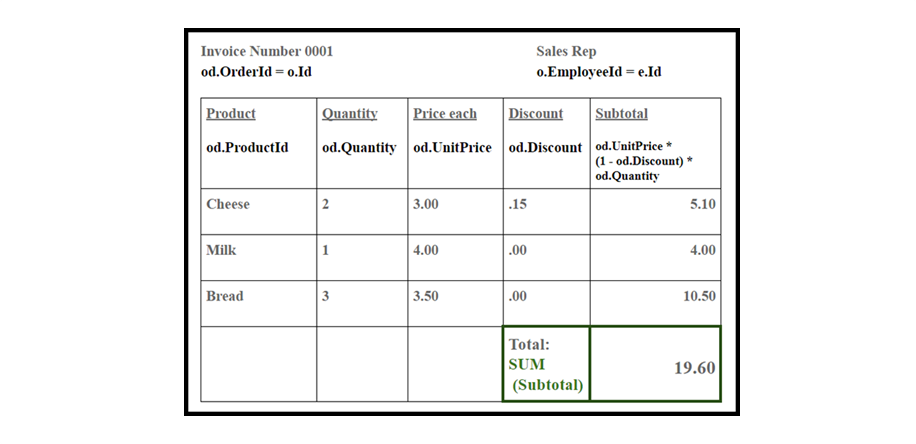           

In [254]:
#Get invoice totals for employees in the London office
london_invoices = pd.read_sql_query('''SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City = "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    ''', engine)

#Get invoice totals for employees in the PNW offices
pnw_invoices = pd.read_sql_query('''SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City != "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    ''', engine)

2019-02-02 21:54:16,009 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City = "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    


INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City = "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    


2019-02-02 21:54:16,011 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2019-02-02 21:54:16,017 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City != "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    


INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            WHERE e.City != "London"
                            GROUP BY od.OrderId
                            ORDER BY e.LastName
                    


2019-02-02 21:54:16,019 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [255]:
#Taking a look at the data
london_invoices.head()

,OrderId,Invoice_total
0,10248,440.00
1,10254,556.62
2,10269,642.20
3,10297,1420.00
4,10320,516.00


In [256]:
pnw_invoices.head()

,OrderId,Invoice_total
0,10262,584.0
1,10268,1101.2
2,10276,420.0
3,10278,1488.8
4,10279,351.0


In [253]:
london_invoices.shape[0], pnw_invoices.shape[0]

(224, 606)

We can compare these two populations directly. We won't take samples from them.

## The experiment: a one-tailed t-test

In [12]:
#A control group from the London invoices
#A treatment group from the PNW invoices
control2 = london_invoices['Invoice_total']
treatment2 = pnw_invoices['Invoice_total']

In [13]:
#Value to compare to p-value
alpha = 0.05

We'll use a t-statistic calculated in a SciPy module to find a p-value to compare to the alpha value here.

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


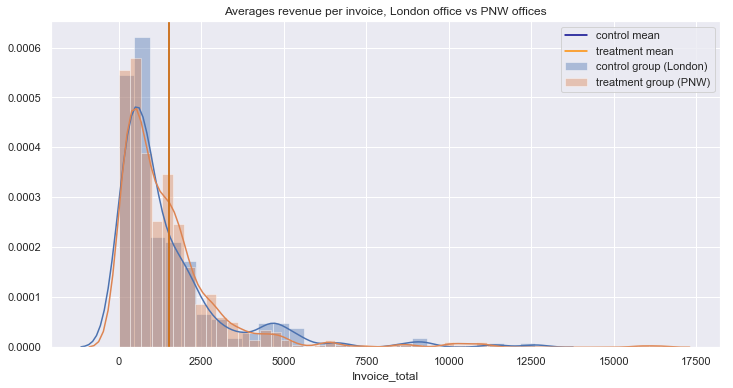

In [248]:
#Plot both distributions

sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(control2, label = "control group (London)")
sns.distplot(treatment2, label = "treatment group (PNW)")
plt.axvline(control2.mean(), color = 'darkblue', label = 'control mean')
plt.axvline(treatment2.mean(), color = 'darkorange', label = 'treatment mean')
plt.title('Averages revenue per invoice, London office vs PNW offices')
plt.legend()
plt.show()

In [249]:
print('London office invoice mean:', control2.mean())
print('Number of London offices invoices:', len(control2))
print('\n')
print('PNW office invoice mean:', treatment2.mean())
print('Number of PNW office invoices:', len(treatment2))

London office invoice mean: 1538.311220982143
Number of London offices invoices: 224


PNW office invoice mean: 1520.1507029702975
Number of PNW office invoices: 606


In [280]:
t2, p2 = stats.ttest_ind(control2,treatment2, equal_var = False)
print('T stat:', t2)
print('P-value:', p2)
if p2 > alpha:
    print('P-value is too high to reject null hypothesis.')

T stat: 0.12383782386231988
P-value: 0.9015080381474158
P-value is too high to reject null hypothesis.


In [279]:
pnw_invoices['Invoice_total'].std()**2, london_invoices['Invoice_total'].std()**2

(3345355.578722791, 3580668.210957621)

### Conclusion

Invoice totals from the London office are, on average, the same or higher than the invoice totals from the PNW offices.

*However . . .*

There's a different way of looking at this issue. London sales reps may be getting the same amount of revenue from their invoices as the PNW sales reps, but what if they are getting fewer invoices overall? They may be generating less revenue for Northwind if they are fulfilling few orders.

In [17]:
#How much revenue is generated by each employee?
#Revenue per employee
emp_rev = pd.read_sql_query('''SELECT e.LastName, e.City,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Revenue
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            GROUP BY e.LastName
                            ORDER BY Revenue DESC
                    ''', engine)
emp_rev

2019-02-02 08:43:18,759 INFO sqlalchemy.engine.base.Engine SELECT e.LastName, e.City,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Revenue
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            GROUP BY e.LastName
                            ORDER BY Revenue DESC
                    
2019-02-02 08:43:18,759 INFO sqlalchemy.engine.base.Engine ()


,LastName,City,Revenue
0,Peacock,Redmond,232890.8460
1,Leverling,Kirkland,202812.8430
2,Davolio,Seattle,192107.6045
3,Fuller,Tacoma,166537.7550
4,Callahan,Seattle,126862.2775
5,King,London,124568.2350
6,Dodsworth,London,77308.0665
7,Suyama,London,73913.1295
8,Buchanan,London,68792.2825


## Insights

Our experiment showed that invoice totals from the London sales reps are not, in fact, lower than those of the PNW office. However, the 4 **London employees generate less overall revenue.** In order to match the PNW employees, the London employees would need to fulfill more orders.

But can they? **We don't know why** they aren't fulfilling as many orders: do they have more bureaucratic hurdles to overcome? Are their customers more difficult? **Are they just lazy?** In order to come up with next steps for the London office, we will **need to collect more data**.

<a id="hypo3"></a>

[(Back to top)](#top)

# Hypothesis Test 3: Sales in 2013 v. 2014

>Did average sales decline in 2014 compared to 2013?

### What are we measuring?

There is more than one way of measuring sales. We could calculate total revenue in each year, but that would depend on our having records of all sales in both years. We will use the average of invoice totals because they are an intuitive unit for those making the sales, our employees, and for those making payment, our customers.

### The hypotheses

>**Null hypothesis**: Average sales in 2013 were less than or equal to average sales in 2014.

>>Control3 (2013 sales) <= Treatment3 (2014 sales)

>**Alternative hypothesis**: Average sales in 2013  were greater than average sales in 2014.

>>Control3 (2013 sales) > Treatment3 (2014 sales)

### The data

Average sales will be measured by taking the mean of invoice totals associated with each year. Each invoice total will be the sum of subtotals per order, where each subtotal on an order is unit price * (1 - discount) * quantity.

In [258]:
#Get invoices for 2013
invoices_2013 = pd.read_sql_query('''SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2013%"
                            GROUP BY od.OrderId
                    ''', engine)
#Get invoices for 2013
invoices_2014 = pd.read_sql_query('''SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                    ''', engine)

2019-02-02 22:11:20,033 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2013%"
                            GROUP BY od.OrderId
                    


INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2013%"
                            GROUP BY od.OrderId
                    


2019-02-02 22:11:20,035 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2019-02-02 22:11:20,042 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                    


INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                    


2019-02-02 22:11:20,044 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [259]:
#Take a look at the data
invoices_2013.head()

,OrderId,Invoice_total
0,10400,3063.000
1,10401,3868.600
2,10402,2713.500
3,10403,855.015
4,10404,1591.250


In [260]:
invoices_2013.shape[0], invoices_2014.shape[0]

(408, 270)

We can use both these populations without sampling from them.

### The experiment: a one-tailed t-test

In [262]:
#Control group from 2013 invoices
#Treatment group from 2014 invoices
control3 = invoices_2013['Invoice_total']
treatment3 = invoices_2014['Invoice_total']

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


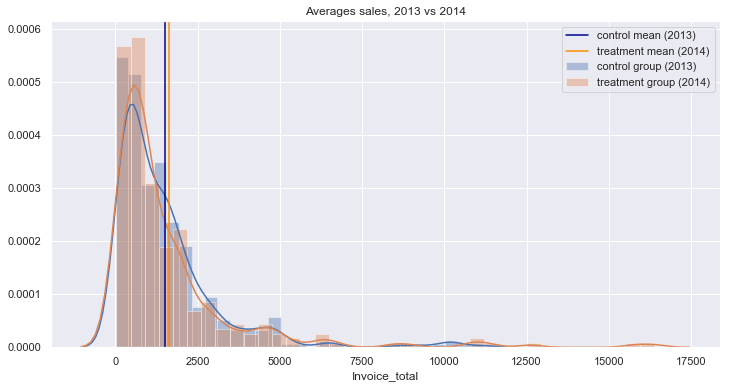

In [263]:
alpha = 0.05

sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(control3, label = "control group (2013)")
sns.distplot(treatment3, label = "treatment group (2014)")
plt.axvline(control3.mean(), color = 'darkblue', label = 'control mean (2013)')
plt.axvline(treatment3.mean(), color = 'darkorange', label = 'treatment mean (2014)')
plt.title('Averages sales, 2013 vs 2014')
plt.legend()
plt.show()

In [282]:
t3, p3 = stats.ttest_ind(control3, treatment3, equal_var = False)
print('T stat:', t3)
print('P-value:', p3)
if p3 > alpha:
    print('P-value is too high to reject null hypothesis.')

T stat: -0.7448729960407308
P-value: 0.4567315145182581
P-value is too high to reject null hypothesis.


### Conclusion

Failure to reject null hypothesis.  Average sales in 2013 were less than or equal to average sales in 2014.

*But what if . . .*

What if lower revenue taken in by Northwind was lower in 2013 than in 2014? This is easy to calculate from the tables we've already created.

In [266]:
print('Revenue in 2013:', round(invoices_2013['Invoice_total'].sum(), 2))
print('Revenue in 2014:', round(invoices_2014['Invoice_total'].sum(), 2))

Revenue in 2013: 617085.2
Revenue in 2014: 440623.87


Revenue was lower in 2014! As a sanity check, we should make sure that orders were fulfilled throughout the full calendar year.

In [276]:
#Modified query to show and order by datetime in descending order (most recent date first)
invoices_2014_by_date = pd.read_sql_query('''SELECT od.OrderId, o.OrderDate,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                            ORDER BY o.OrderDate DESC
                    ''', engine)
invoices_2014_by_date.head()

2019-02-02 22:23:46,691 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId, o.OrderDate,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                            ORDER BY o.OrderDate DESC
                    


INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId, o.OrderDate,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            WHERE o.OrderDate LIKE "2014%"
                            GROUP BY od.OrderId
                            ORDER BY o.OrderDate DESC
                    


2019-02-02 22:23:46,693 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,OrderId,OrderDate,Invoice_total
0,11074,2014-05-06,232.0850
1,11075,2014-05-06,498.1000
2,11076,2014-05-06,792.7500
3,11077,2014-05-06,1255.7205
4,11070,2014-05-05,1629.9750


So the last order from 2014 was placed in May. 

## Insights

Whoever made the original complaint about declining revenue has not been vindicated--yet. **Revenue per sale did not fall** from 2013 to 2014, and we **don't know for sure if overall revenue fell** because the records aren't complete.

If we can get our hands on the invoices for the rest of the year 2014, we'll be able to make comparisons about overall revenue.

<a id="hypo4"></a>

[(Back to top)](#top)

# Hypothesis test 4: Orders and beverages

>Do orders containing beverages bring in more revenue on average than orders without beverages?

### What are we measuring?

In an effort to boost revenue, sales reps are often asked to try to push the customer to add cases of beverages onto an order before it gets fulfilled. We will measure whether this works: we will compare the invoice totals for orders that contained any beverages versus those that didn't.

### The hypotheses

>**Null hypothesis**: Invoice totals for orders not containing beverages are greater than or equal to totals for orders containing beverages.

>>Control4 (orders without beverages) >= Treatment4 (orders with beverages)

>**Alternative hypothesis**: Invoice totals for orders not containing beverages are less than invoice totals for orders containing beverages.

>>Control4 (orders without beverages) < Treatment4 (orders with beverages)

### The data

An invoice total will be the sum of subtotals per order, where each subtotal on an order is unit price * (1 - discount) * quantity. 

The control group will exclude invoices containing order details matching the "Beverage" product category. 

The treatment group exclude invoices without order details matching the "Beverage" product category.

In [283]:
#Get invoice subtotals by product category
cat_subtotals = pd.read_sql_query('''SELECT od.OrderId, e.LastName,
                            SUM(CASE WHEN c.CategoryName == 'Beverages'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Bev_rev,
                            SUM(CASE WHEN c.CategoryName == 'Dairy Products'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Dairy_rev,
                            SUM(CASE WHEN c.CategoryName == 'Confections'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Confe_rev,
                            SUM(CASE WHEN c.CategoryName == 'Meat/Poultry'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Meat_rev,
                            SUM(CASE WHEN c.CategoryName == 'Seafood'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Seaf_rev,
                            SUM(CASE WHEN c.CategoryName == 'Condiments'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Condi_rev,
                            SUM(CASE WHEN c.CategoryName == 'Produce'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Veg_rev,
                            SUM(CASE WHEN c.CategoryName == 'Grains/Cereals'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Grain_rev,
                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderId = o.Id
                            JOIN Product p ON od.ProductId = p.Id
                            JOIN Category c ON p.CategoryId = c.Id
                            JOIN Employee e ON o.EmployeeId = e.Id
                            GROUP BY od.OrderId
                            ORDER BY od.OrderId
                    ''', engine)

2019-02-02 23:03:23,644 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId, e.LastName,
                            SUM(CASE WHEN c.CategoryName == 'Beverages'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Bev_rev,
                            SUM(CASE WHEN c.CategoryName == 'Dairy Products'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Dairy_rev,
                            SUM(CASE WHEN c.CategoryName == 'Confections'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Confe_rev,
                            SUM(CASE WHEN c.CategoryName == 'Meat/Poultry'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
      

INFO:sqlalchemy.engine.base.Engine:SELECT od.OrderId, e.LastName,
                            SUM(CASE WHEN c.CategoryName == 'Beverages'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Bev_rev,
                            SUM(CASE WHEN c.CategoryName == 'Dairy Products'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Dairy_rev,
                            SUM(CASE WHEN c.CategoryName == 'Confections'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                                ELSE 0 END
                                ) Confe_rev,
                            SUM(CASE WHEN c.CategoryName == 'Meat/Poultry'
                                THEN (od.UnitPrice * (1 - od.Discount)) * od.Quantity
                              

2019-02-02 23:03:23,646 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [284]:
#Take a look at the data
cat_subtotals.head(10)

,OrderId,LastName,Bev_rev,Dairy_rev,Confe_rev,Meat_rev,Seaf_rev,Condi_rev,Veg_rev,Grain_rev,Invoice_total
0,10248,Buchanan,0.0,342.0,0.0,0.00,0.0,0.0,0.0,98.00,440.00
1,10249,Suyama,0.0,0.0,0.0,0.00,0.0,0.0,1863.4,0.00,1863.40
2,10250,Peacock,0.0,0.0,0.0,0.00,77.0,214.2,1261.4,0.00,1552.60
3,10251,Leverling,0.0,0.0,0.0,0.00,0.0,336.0,0.0,318.06,654.06
4,10252,Peacock,0.0,1135.5,2462.4,0.00,0.0,0.0,0.0,0.00,3597.90
5,10253,Leverling,604.8,200.0,640.0,0.00,0.0,0.0,0.0,0.00,1444.80
6,10254,Buchanan,45.9,0.0,0.0,342.72,0.0,0.0,168.0,0.00,556.62
7,10255,Dodsworth,304.0,1320.0,486.5,0.00,380.0,0.0,0.0,0.00,2490.50
8,10256,Leverling,0.0,0.0,0.0,393.00,0.0,124.8,0.0,0.00,517.80
9,10257,Peacock,86.4,0.0,877.5,0.00,0.0,156.0,0.0,0.00,1119.90


In [131]:
control4.shape[0], treatment4.shape[0]

(476, 354)

We can compare these populations directly, without sampling.

### The experiment:  a one-tailed t-test

In [287]:
#A control group for invoice totals without beverages
control4 = cat_subtotals[cat_subtotals['Bev_rev'] == 0.0]['Invoice_total']
#A control group for invoice totals with beverages
treatment4 = cat_subtotals[cat_subtotals['Bev_rev'] != 0.0]['Invoice_total']

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


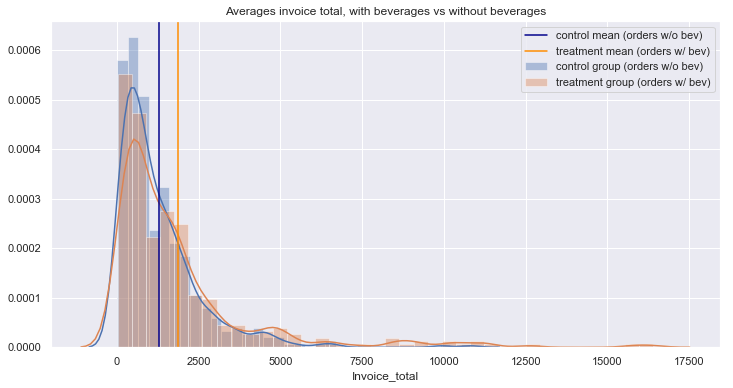

In [288]:
alpha = 0.05

#Plot the distribution
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(control4, label = "control group (orders w/o bev)")
sns.distplot(treatment4, label = "treatment group (orders w/ bev)")
plt.axvline(control4.mean(), color = 'darkblue', label = 'control mean (orders w/o bev)')
plt.axvline(treatment4.mean(), color = 'darkorange', label = 'treatment mean (orders w/ bev)')
plt.title('Averages invoice total, with beverages vs without beverages')
plt.legend()
plt.show()

In [286]:
t4, p4 = stats.ttest_ind(control4, treatment4, equal_var = False)
print('T stat:', t4)
print('P-value:', p4)
if p4 > alpha:
    print('P-value is too high to reject null hypothesis.')
elif p4 < alpha:
    print('P-value is low enough to reject null hypothesis.')

T stat: -4.266735540401764
P-value: 2.3665448470393296e-05
P-value is low enough to reject null hypothesis.


### Conclusion

Null hypothesis rejected. Invoice totals for orders not containing beverages are less than invoice totals for orders containing beverages.

## Insights

It's a common trope in the food service world that adding on drinks to food orders will boost revenue. Here it is borne out: the **orders with beverages have higher totals**. We recommend **formalizing the "drink push"** as part of every sale made by a rep to a customer.

It would be interesting to investigate which other categories boost revenue, and we've got the table set up for it already. But what adding something special from the confections category onto an order of cheap bulk grains? What about adding seafood to an order that already has meat? (e.g. "While you're buying proteins...)

In [ ]:
#HYPO 1 PART 2
#TESTING TREATMENT  GROUPS
#for treatment in treatments:
#    print('mean:', round(treatment.mean(),2)) 
#    print('zero values:', len(treatment[treatment == 0]))
#    print('non-zero values:', len(treatment[treatment != 0.0]))

In [ ]:
#Build a sampling distribution of the data 
#in order to get it more "normal"
#NOT IN USE, REPLACED BY BOOTSTRAPPING
#def sampling_dist(data, dist=50, n=30):

#    sample_dist = []
   
#    while len(sample_dist) != dist: #Build a sample distribution
#        sample = []
#        while len(sample) != n:
#            x = np.random.choice(data) #Get a value from the data with replacement
#            sample.append(x) #Add the value to the sample
#        sample_mean = sum(sample) / len(sample) #Get the mean of the sample
#        sample_dist.append(sample_mean) #Add the mean to the sampling distribution
    
#    return sample_dist

In [ ]:
#FROM HYPO 4
#from scipy.stats import t

#ntails = 2
#dof = len(control4) + len(treatment4) - 2
#t4_crit = abs(stats.t.ppf(alpha/ntails, dof))

#EXPERIMENTAL LINE
#plt.vlines([-t4_crit, t4_crit], 0, 0.0007, colors='r')

In [ ]:
#SANITY CHECK for years of orders
#orders = pd.read_sql_query('''SELECT o.OrderDate, o.RequiredDate, o.ShippedDate
#                                FROM [Order] o
#                               ORDER BY o.OrderDate ASC
#                            ''', engine)
#orders.head()

In [ ]:
# REVENUE PER EMPLOYEE SANITY CHECK
#Working toward revenue per employee
#revenue_test = pd.read_sql_query('''SELECT e.LastName, od.OrderId,
#                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
#                            FROM OrderDetail od
#                            JOIN [Order] o ON od.OrderId = o.Id
#                            JOIN Employee e ON o.EmployeeId = e.Id
#                            GROUP BY od.OrderId
#                            ORDER BY e.LastName
#                    ''', engine)

#proof for revenue per employee via df
#revenue_test[revenue_test['LastName'] == 'Buchanan']['Invoice_total'].sum()
#Buchanan did 68792.2825 in sales

In [ ]:

#HYPO 2 SANITY CHECK CODE


#Working towards getting invoice totals
#df = pd.read_sql_query('''SELECT od.*,
#                            ((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Subtotal
#                            FROM OrderDetail od
#                    ''', engine)

#Get total revenue per invoice (sum of subtotals from all order details per order)
#df = pd.read_sql_query('''SELECT od.OrderId,
#                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
#                            FROM OrderDetail od
#                            GROUP BY od.OrderId
#                    ''', engine)

#Get total revenue per invoice and employee
#df = pd.read_sql_query('''SELECT od.OrderId, e.LastName, e.City,
#                            SUM((od.UnitPrice * (1 - od.Discount)) * od.Quantity) Invoice_total
#                            FROM OrderDetail od
#                            JOIN [Order] o ON od.OrderId = o.Id
#                            JOIN Employee e ON o.EmployeeId = e.Id
#                            GROUP BY od.OrderId
#                            ORDER BY e.LastName
#                    ''', engine)

In [ ]:
#HYPO 1 PART 1
#Sanity check for quantities
#w/o discount. ALL GOOD
#df_wo_discount = pd.read_sql_query('''SELECT [Order].CustomerId, 
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount == 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_nodisc
#                                        FROM OrderDetail
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                    ''', engine)

#w/ discount
#df_w_discount = pd.read_sql_query('''SELECT [Order].CustomerId,
#                                        SUM(
#                                            CASE WHEN OrderDetail.Discount != 0.0
#                                            THEN OrderDetail.Quantity ELSE 0 END
#                                            ) quants_disc
#                                        FROM OrderDetail 
#                                        INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                                        WHERE OrderDetail.Discount != 0.0
#                                        GROUP BY [Order].CustomerId
#                                        ORDER BY [Order].CustomerId ASC
#                                ''', engine)

In [ ]:
#HYPO 1 PART 1
#Not sure whether grouping is affecting the quantity sums per order. 
#i.e. is it adding up the quantities for every record assoc with an order id or just for one?
#Look at number of orders per cust id
#alfki = pd.read_sql_query("""SELECT [Order].CustomerId, OrderDetail.*
#                            FROM OrderDetail 
#                            
#                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                            WHERE [Order].CustomerId == 'ALFKI'
#                        """, engine)
#PROVEN: sum is of quantities for every record not the group
#alfki['Quantity'].sum()

In [103]:
#FAILED T DIST METHOD TO BE DELETED
#Check for similarity between sampling distribution means
#and population means
control1.mean(), discs_ords['quant_no_disc'].mean()

(320.30266666666665, 321.3370786516854)

In [104]:
treatment1.mean(), discs_ords['quant_all_discs'].mean()

(255.23933333333335, 255.25842696629215)

In [ ]:
#Both are pretty close

In [34]:
diff = control1.mean() - treatment1.mean()
diff

64.24199999999996

C:\Users\Stee\Anaconda3good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


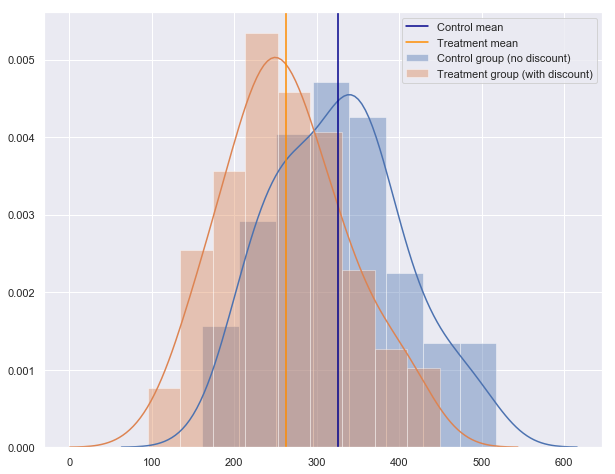

In [90]:
#Compare both sampling distributions with hist and kde
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(control1, label = "Control group (no discount)")
sns.distplot(treatment1, label = "Treatment group (with discount)")
plt.axvline(control1.mean(), color = 'darkblue', label = 'Control mean')
plt.axvline(treatment1.mean(), color = 'darkorange', label = 'Treatment mean')
plt.legend()
plt.show()

In [28]:
#This plot shows that the mean for the control group is higher.
#The question is, where on the distribution for the control group
#would the value for the mean of the treament group fall? If it is
#outside the critical region in the tails, then it will not be statistically
#significantly different.

In [108]:
control1.mean(), treatment1.mean()

(320.30266666666665, 255.23933333333335)

In [92]:
control1.std(), treatment1.std()

(78.659613988939, 74.82993678706107)

In [55]:
#Calculate a two-sample t statistic
#First get variance of both samples
var = ((control1.std()**2) + (treatment1.std()**2)) / (len(control1) + len(treatment1) - 2)
var

59.5295672345679

In [59]:
control1.std()**2

6187.334872888888

In [62]:
treatment1.std()**2

5599.519439555556

In [78]:
control1_var = sum([(i - np.mean(control1))**2 for i in control1])
control1_var

618733.4872888888

In [79]:
treatment1_var = sum([(i - np.mean(treatment1))**2 for i in treatment1])
treatment1_var

559951.9439555553

In [67]:
#FROM THE LAB ON TWO SAMPLE T TESTS
#def variance(sample):
#    sample_mean = np.mean(sample)
#    return sum([(i - sample_mean)**2 for i in sample])
#def sample_variance(sample1, sample2):
#    n_1, n_2 = len(sample1), len(sample2)
#    var_1, var_2 = variance(sample1), variance(sample2)
#    return (var_1 + var_2)/((n_1 + n_2)-2)

In [80]:
vari = (control1_var + treatment1_var) / (len(control1) + len(treatment1) -2)
vari

5952.9567234567885

In [81]:
#Build numerator for t statistic
numer = np.mean(treatment1) - np.mean(control1)
#Build denominator for t statistic
denom = np.sqrt(vari * ((1/len(treatment1)) + (1/len(control1))))
t = numer / denom
t

-5.887591810766747

In [109]:
test_stat, p_value = stats.ttest_ind(treatment1, control1)
test_stat, p_value

(-5.508644149453619, 1.1153214293532252e-07)

In [111]:
#Another way to find the t value
t_alt = stats.t.ppf(q = 0.975, df = (len(control1) + len(treatment1) -2))
t_alt

1.9720174778338955

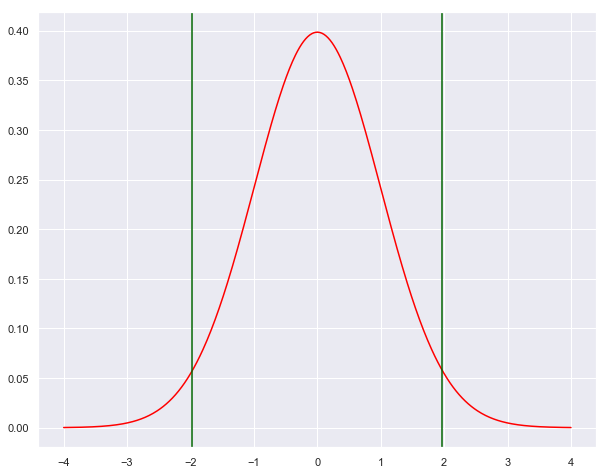

In [106]:
#Draw a t distribution
#A set of points for x
xs = np.linspace(-4, 4, 500)
#A probability density function for the t-dist
ys = stats.t.pdf(xs, (len(control1) + len(treatment1) - 2), 0, 1)

#Draw a figure
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
#t dist in red
ax.plot(xs, ys, color = 'red')
#critical region
ax.axvline(t_alt, color = 'darkgreen')
#other critical region
ax.axvline(-t_alt, color = 'darkgreen')
plt.show()

In [85]:
stats.t.sf(abs(t), len(control1) + len(treatment1) - 1) * 2

1.64338928498428e-08

In [10]:
#MORE BOOTSTRAPPING CODE FOR HYPO 1. FINDS THE CONFIDENCE INTERVALS
#NOT NEEDED FOR HYPO 1, SAVE FOR LATER
#control1_boot = [] #10,000 permutations with replacement 
#for i in range(permus):
#    np.random.seed(i)
#    control1_boot.append((resample(control1)))

#control1_boot = np.mean(control1_boot, axis = 1)
#control1_boot #10,000 means

#treatment1_boot = [] #10,000 permutations with replacement 
#for i in range(permus):
#    np.random.seed(i)
#    treatment1_boot.append((resample(treatment1)))

#treatment1_boot = np.mean(treatment1_boot, axis = 1)
#treatment1_boot #10,000 means

#Get the difference between control and treatment to 
#find the confidence interval
#diffs = control1_boot - treatment1_boot
#lower_bound = np.percentile(diffs, 2.5)
#upper_bound = np.percentile(diffs, 97.5)

#Plot the confidence interval
#fig = plt.figure(figsize=(10,3))
#ax = plt.hist(diffs, bins=30)

#plt.xlabel('Differences between quantities of items ordered, no-discount vs with-discount')
#plt.ylabel('Frequency')
#plt.axvline(lower_bound, color = 'green')
#plt.axvline(upper_bound, color = 'green')
#plt.axvline(66.07, color = 'red') #true difference in means
#plt.title('Bootstrapped Pop (Differences Between 2 Control 1 & Treatment 1)')
#plt.show()

#print('95% confidence that true difference between control and treatment groups is between', 
#      round(lower_bound, 2), 'and', round(upper_bound, 2), ', assuming null hypothesis is correct.')

#mu1 = discs_ords['quant_no_disc'].mean() - discs_ords['quant_all_discs'].mean()
#print('The true difference in means for control 1 and treatment 1 is', mu1)

In [ ]:
####EDA
#Look at how many customers each company has
df = pd.read_sql_query("""SELECT Customer.Id, Customer.CompanyName
                            FROM Customer
                            ORDER BY Customer.CompanyName
                        """, engine)

In [ ]:
#Every company has only one customer. Orders can therefore be counted by customer or by company.
sum(df['CompanyName'].value_counts() > 1)

In [ ]:
#Look at number of orders per customer w/o discount
#df_wo_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
#                            FROM OrderDetail 
#                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                            WHERE OrderDetail.Discount == 0.0
#                            GROUP BY [Order].CustomerId
#                            ORDER BY [Order].CustomerId ASC
#                        """, engine)

#Look at number of orders per customer w/ discount
#df_w_discount = pd.read_sql_query("""SELECT [Order].CustomerId, Count(*) orders
#                            FROM OrderDetail 
#                            INNER JOIN [Order] on OrderDetail.OrderId = [Order].Id
#                            WHERE OrderDetail.Discount != 0.0
#                            GROUP BY [Order].CustomerId
#                            ORDER BY [Order].CustomerId ASC
#                        """, engine)